In [1]:
import pandas as pd
import os, sys

In [2]:
output_dir = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/FINAL_RESULTS/without_sanity_check"

In [3]:


l_samples = [
    #"2021-07-29-HWYJ2AFX2/HGSVCxpool1x01",
#    "2021-08-03-H22VWAFX3/HGSVCxpool2x02",
   # "2021-08-03-H22VWAFX3/HGSVCxpool3x01",
 "2023-11-09-HW5NFAFX5/HGSVCpool1NEW",
#    "2023-11-09-HW3YVAFX5/LanexHGSVCpool2NEW",
]

sample = l_samples[0].split("/")[-1]

#l_samples = [
#"2021-08-03-H22VWAFX3/HGSVCxpool3x01"
#"2021-08-03-H22VWAFX3/HGSVCxpool3x01"
#"2021-07-29-HWYJ2AFX2/HGSVCxpool1x01"
#"2023-11-09-HW3YVAFX5/LanexHGSVCpool2NEW"
#"2023-11-09-HW5NFAFX5/HGSVCpool1NEW"
#"2021-05-12-HMCNFAFX2/GM18989x01",
#"2021-04-21-HMNJLAFX2/GM19320x01",
#"2021-05-12-HMCNFAFX2/GM19331x01",
#"2021-05-31-HNLFLAFX2/GM19836x01",
#"2021-05-31-HNLFLAFX2/GM20355x01",
#"2021-05-06-HN2VJAFX2/GM21487x01",
#"2021-04-21-HMNJLAFX2/HG02282x03",
#"2021-05-06-HN2VJAFX2/HG02554x01",
#"2021-05-31-HNLFLAFX2/HG02666x02",
#"2021-04-21-HMNJLAFX2/HG02769x01",
#"2021-05-06-HN2VJAFX2/HG02953x01",
#"2021-05-12-HMCNFAFX2/HG03452x02",
#]

year = list(set([e.split("-")[0] for e in l_samples]))[0]
index = "PE20" if year == "2021" else "iTRU"
os.makedirs(f"{output_dir}/{sample}", exist_ok=True)

In [4]:
ref_path = f"/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/{sample}/merge.txt.gz"
#ref_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/HGSVCxpool3x01/merge.txt.gz"
# ref_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/PSEUDOPOOL/merge.txt.gz"
ref = pd.read_csv(ref_path, compression="gzip", sep="\t",)
ref["GlobalSample"] = ref_path.split("/")[-2]

if "with_sanity_check" in output_dir:

    sanity_check_path = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/BCFTOOLS_CONCAT_TAB/Random_for_sanity_check/merge.txt.gz"
    sanity_check_ref = pd.read_csv(sanity_check_path, compression="gzip", sep="\t")
    sanity_check_ref["GlobalSample"] = sanity_check_path.split("/")[-2]

    ref = pd.concat([ref, sanity_check_ref])

ref["ID"] = "chr" + ref["ID"]
ref

ID   AC        AF   SAMPLE   GlobalSample
0            chr10:10510:A:T   28  0.004372  HG00120  HGSVCpool1NEW
1            chr10:10547:G:C   14  0.002186  HG00120  HGSVCpool1NEW
2            chr10:10658:G:C   13  0.002030  HG00120  HGSVCpool1NEW
3            chr10:10712:C:T   94  0.014678  HG00120  HGSVCpool1NEW
4            chr10:13697:A:G    8  0.001249  HG00120  HGSVCpool1NEW
...                      ...  ...       ...      ...            ...
13675241  chrX:156008463:G:A   49  0.007651  NA21101  HGSVCpool1NEW
13675242  chrX:156009266:T:G  278  0.043410  NA21101  HGSVCpool1NEW
13675243  chrX:156022623:C:T   45  0.007027  NA21101  HGSVCpool1NEW
13675244  chrX:156029674:G:A   54  0.008432  NA21101  HGSVCpool1NEW
13675245  chrX:156029818:G:A   13  0.002030  NA21101  HGSVCpool1NEW

[13675246 rows x 5 columns]

In [5]:
ref.groupby(["GlobalSample", "SAMPLE"])["ID"].count()

GlobalSample   SAMPLE 
HGSVCpool1NEW  HG00120    209450
               HG00138    199961
               HG00149    194534
               HG00324    200798
               HG00361    202495
               HG00443    196804
               HG00565    191997
               HG00736    249985
               HG01108    639243
               HG01455    221545
               HG01479    227850
               HG01506    217622
               HG01550    247423
               HG01756    217198
               HG01879    718648
               HG01971    301655
               HG01982    182031
               HG02060    205683
               HG02087    187846
               HG02364    185276
               HG02546    781407
               HG02580    748276
               HG03009    210495
               HG03052    875743
               HG03073    858397
               HG03265    780734
               HG03461    853313
               HG03792    208369
               HG04062    225284
               NA108

In [6]:
ref_count = ref.groupby(["GlobalSample", "SAMPLE"])["ID"].count().reset_index()
ref_count.to_csv(f"{output_dir}/{sample}/reference_file_SNP_counts.tsv", sep="\t")
ref_count.head()


GlobalSample   SAMPLE      ID
0  HGSVCpool1NEW  HG00120  209450
1  HGSVCpool1NEW  HG00138  199961
2  HGSVCpool1NEW  HG00149  194534
3  HGSVCpool1NEW  HG00324  200798
4  HGSVCpool1NEW  HG00361  202495

In [7]:
#sanity_check_ref.SAMPLE.unique()

In [8]:
import glob
final_vcf = list()
for vcf_input in glob.glob(f"/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/SNP_DISCOVERY/{sample}/*.vcf"):
    cell_line = vcf_input.split("/")[-1].split("_")[0].replace(".vcf", "")
    vcf = pd.read_csv(vcf_input, skiprows=255, sep="\t")
    vcf["cell_line"] = cell_line
    vcf["ID"] = vcf["#CHROM"] + ":" + vcf["POS"].astype(str) + ":" + vcf["REF"]+ ":"  + vcf["ALT"]
    vcf = vcf.drop([cell_line.split(f"{index}")[0]], axis=1)
    final_vcf.append(vcf)
final_vcf = pd.concat(final_vcf)
final_vcf.to_csv(f"{output_dir}/{sample}/full_set_of_SNPs_called.tsv.gz", sep="\t", compression="gzip")

final_vcf.head()

#CHROM      POS                ID REF ALT      QUAL FILTER  \
0   chr1  2652366  chr1:2652366:C:G   C   G   2.34069      .   
1   chr1  2916729  chr1:2916729:G:A   G   A  56.32870      .   
2   chr1  4132647  chr1:4132647:A:G   A   G  35.44630      .   
3   chr1  4682963  chr1:4682963:C:G   C   G  56.32870      .   
4   chr1  4858124  chr1:4858124:A:G   A   G  35.44630      .   

                                                INFO                FORMAT  \
0  AB=0.8;ABP=6.91895;AC=1;AF=0.5;AN=2;AO=4;CIGAR...  GT:DP:AD:RO:QR:AO:QA   
1  AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...  GT:DP:AD:RO:QR:AO:QA   
2  AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...  GT:DP:AD:RO:QR:AO:QA   
3  AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...  GT:DP:AD:RO:QR:AO:QA   
4  AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...  GT:DP:AD:RO:QR:AO:QA   

                cell_line  
0  HGSVCpool1NEWiTRUE7G12  
1  HGSVCpool1NEWiTRUE7G12  
2  HGSVCpool1NEWiTRUE7G12  
3  HGSVCpool1NEWiTRUE7G12  
4  HGSVCpool1NEWiTRUE7G12

In [9]:
merge_df = pd.merge(final_vcf, ref, on="ID", how="inner")
merge_df.to_csv(f"{output_dir}/{sample}/join_ref_to_SNPs_called.tsv.gz", sep="\t", compression="gzip")
merge_df.head()

#CHROM       POS                 ID REF ALT     QUAL FILTER  \
0   chr1   5637654   chr1:5637654:C:T   C   T  56.3287      .   
1   chr1   5637654   chr1:5637654:C:T   C   T  56.3287      .   
2   chr1   5637654   chr1:5637654:C:T   C   T  56.3287      .   
3   chr1  94247307  chr1:94247307:G:A   G   A  56.3287      .   
4   chr1  94247307  chr1:94247307:G:A   G   A  56.3287      .   

                                                INFO                FORMAT  \
0  AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...  GT:DP:AD:RO:QR:AO:QA   
1  AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...  GT:DP:AD:RO:QR:AO:QA   
2  AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...  GT:DP:AD:RO:QR:AO:QA   
3  AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...  GT:DP:AD:RO:QR:AO:QA   
4  AB=0;ABP=0;AC=2;AF=1;AN=2;AO=2;CIGAR=1X;DP=2;D...  GT:DP:AD:RO:QR:AO:QA   

                cell_line   AC        AF   SAMPLE   GlobalSample  
0  HGSVCpool1NEWiTRUE7G12  320  0.049969  HG00361  HGSVCpool1NEW  
1  HGSVCpool1NEWiTRUE7G12  320  0.049969  HG02060  HGSVCpool1NEW  
2  HGSVCpool1NEWiTRUE7G12  320  0.049969  NA12890  HGSVCpool1NEW  
3  HGSVCpool1NEWiTRUE7G12   95  0.014835  HG01756  HGSVCpool1NEW  
4  HGSVCpool1NEWiTRUE7G12   95  0.014835  NA10851  HGSVCpool1NEW

In [10]:


pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
mosaicatcher_stats = pd.concat([pd.read_csv("/scratch/tweber/DATA/MC_DATA/STOCKS/{}/counts/{}.info_raw".format(sample, sample.split("/")[-1]), sep="\t", skiprows=13) for sample in l_samples])
mosaicatcher_stats["cell"] = mosaicatcher_stats["cell"].str.replace(".sort.mdup.bam", "")
mosaicatcher_stats.head()

sample                   cell  medbin   mapped  suppl     dupl  \
0  HGSVCpool1NEW  HGSVCpool1NEWiTRU1A01       0    24310    113    23101   
1  HGSVCpool1NEW  HGSVCpool1NEWiTRU1A02      12  1523942    596  1032062   
2  HGSVCpool1NEW  HGSVCpool1NEWiTRU1A03       1    95511    175    38929   
3  HGSVCpool1NEW  HGSVCpool1NEWiTRU1A04       1   114546    155    36320   
4  HGSVCpool1NEW  HGSVCpool1NEWiTRU1A05       5   508336    243   291798   

    mapq   read2    good  pass1      nb_p     nb_r  nb_a  \
0    719     253     124      0  0.000000  0.00000   0.0   
1  54499  214673  222112      1  0.244266  4.98251   0.1   
2   4449   25796   26162      0  0.000000  0.00000   0.0   
3   5569   35894   36608      0  0.000000  0.00000   0.0   
4  24749   94198   97348      1  0.244266  2.17831   0.1   

                                                 bam  
0  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
2  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
3  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
4  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...

In [11]:


pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
ashleys_labels = pd.concat([pd.read_csv(f"/scratch/tweber/DATA/MC_DATA/STOCKS/{sample}/cell_selection/labels.tsv", sep="\t") for sample in l_samples])
ashleys_labels["cell"] = ashleys_labels["cell"].str.replace(".sort.mdup.bam", "")
ashleys_labels.head()

cell  prediction  probability         sample
0  HGSVCpool1NEWiTRU1A01           0       0.0000  HGSVCpool1NEW
1  HGSVCpool1NEWiTRU1A02           0       0.0252  HGSVCpool1NEW
2  HGSVCpool1NEWiTRU1A03           0       0.0000  HGSVCpool1NEW
3  HGSVCpool1NEWiTRU1A04           0       0.0001  HGSVCpool1NEW
4  HGSVCpool1NEWiTRU1A05           1       0.7218  HGSVCpool1NEW

In [12]:
combine_ashleys_mc_stats = pd.merge(ashleys_labels, mosaicatcher_stats, on=["sample", "cell"], how="inner")
combine_ashleys_mc_stats.head()

cell  prediction  probability         sample  medbin  \
0  HGSVCpool1NEWiTRU1A01           0       0.0000  HGSVCpool1NEW       0   
1  HGSVCpool1NEWiTRU1A02           0       0.0252  HGSVCpool1NEW      12   
2  HGSVCpool1NEWiTRU1A03           0       0.0000  HGSVCpool1NEW       1   
3  HGSVCpool1NEWiTRU1A04           0       0.0001  HGSVCpool1NEW       1   
4  HGSVCpool1NEWiTRU1A05           1       0.7218  HGSVCpool1NEW       5   

    mapped  suppl     dupl   mapq   read2    good  pass1      nb_p     nb_r  \
0    24310    113    23101    719     253     124      0  0.000000  0.00000   
1  1523942    596  1032062  54499  214673  222112      1  0.244266  4.98251   
2    95511    175    38929   4449   25796   26162      0  0.000000  0.00000   
3   114546    155    36320   5569   35894   36608      0  0.000000  0.00000   
4   508336    243   291798  24749   94198   97348      1  0.244266  2.17831   

   nb_a                                                bam  
0   0.0  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
1   0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
2   0.0  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
3   0.0  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
4   0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...

In [13]:
gb_sample_count = merge_df.rename({"cell_line": "cell"}, axis=1).groupby(["cell", "GlobalSample", "SAMPLE"])["ID"].count().reset_index()
gb_sample_count_stats = gb_sample_count.rename(columns={"cell_line": "cell"})
gb_sample_count_stats = pd.merge(gb_sample_count_stats, combine_ashleys_mc_stats, on=["cell"], how="inner")
gb_sample_count_stats = gb_sample_count_stats.loc[gb_sample_count_stats["prediction"] == 1]
gb_sample_count_stats["cell"] = gb_sample_count_stats["cell"].apply(lambda r: r.split(index)[1])
gb_sample_count_stats.to_csv(f"{output_dir}/{sample}/groupby_sample_counts_with_stats.tsv.gz", sep="\t", compression="gzip")
gb_sample_count_stats.head()

cell   GlobalSample   SAMPLE  ID  prediction  probability         sample  \
46  1A05  HGSVCpool1NEW  HG00149   1           1       0.7218  HGSVCpool1NEW   
47  1A05  HGSVCpool1NEW  HG00361   2           1       0.7218  HGSVCpool1NEW   
48  1A05  HGSVCpool1NEW  HG00736   2           1       0.7218  HGSVCpool1NEW   
49  1A05  HGSVCpool1NEW  HG01108   6           1       0.7218  HGSVCpool1NEW   
50  1A05  HGSVCpool1NEW  HG01506   1           1       0.7218  HGSVCpool1NEW   

    medbin  mapped  suppl    dupl   mapq  read2   good  pass1      nb_p  \
46       5  508336    243  291798  24749  94198  97348      1  0.244266   
47       5  508336    243  291798  24749  94198  97348      1  0.244266   
48       5  508336    243  291798  24749  94198  97348      1  0.244266   
49       5  508336    243  291798  24749  94198  97348      1  0.244266   
50       5  508336    243  291798  24749  94198  97348      1  0.244266   

       nb_r  nb_a                                                bam  
46  2.17831   0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
47  2.17831   0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
48  2.17831   0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
49  2.17831   0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...  
50  2.17831   0.1  /scratch/tweber/DATA/MC_DATA/STOCKS/2023-11-09...

In [14]:
gb_sample_count_stats.cell.nunique()

217

In [15]:
#pivot_table_stats

In [16]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
pivot_table_stats = pd.pivot_table(gb_sample_count_stats, columns=["GlobalSample", "SAMPLE"], index="cell", values="ID").fillna(0)
import scipy.stats as stats
pivot_table_stats_zscore = pivot_table_stats.apply(lambda x: stats.zscore(x), axis=1)
pivot_table_stats_zscore.to_csv(f"{output_dir}/{sample}/pivot_table_zscore_norm.tsv.gz", sep="\t", compression="gzip")
#pivot_table_stats_zscore.index = [e.split(index)[1] for e in pivot_table_stats_zscore.index]
pivot_table_stats_zscore.head()

GlobalSample HGSVCpool1NEW                                                    \
SAMPLE             HG00120   HG00138   HG00149   HG00324   HG00361   HG00443   
cell                                                                           
1A05             -0.396384 -0.396384 -0.318340 -0.396384 -0.240295 -0.396384   
1A06              0.526569 -0.045134 -0.330986 -0.330986 -0.330986 -0.330986   
1A07              0.365336 -0.295748  0.806058  0.365336  0.365336 -0.516109   
1A08             -0.473952  0.205677  0.205677 -0.134137 -0.134137 -0.473952   
1A14              0.248815  0.248815 -0.539099  0.248815 -0.145142 -0.539099   

GlobalSample                                                              \
SAMPLE         HG00565   HG00736   HG01108   HG01455   HG01479   HG01506   
cell                                                                       
1A05         -0.396384 -0.240295  0.071883 -0.396384 -0.396384 -0.318340   
1A06         -0.330986 -0.330986 -0.045134 -0.045134  5.957751 -0.045134   
1A07         -0.516109  0.365336 -0.295748 -0.516109 -0.295748  0.585697   
1A08         -0.473952 -0.134137 -0.473952 -0.134137 -0.134137  0.885306   
1A14         -0.145142 -0.539099 -0.539099  0.248815 -0.145142 -0.539099   

GlobalSample                                                              \
SAMPLE         HG01550   HG01756   HG01879   HG01971   HG01982   HG02060   
cell                                                                       
1A05         -0.318340 -0.318340  0.384061 -0.240295 -0.396384 -0.318340   
1A06         -0.045134 -0.045134 -0.045134 -0.045134 -0.045134 -0.330986   
1A07         -0.075387 -0.295748 -0.295748 -0.516109  0.144974 -0.295748   
1A08          0.545491  0.205677 -0.134137 -0.134137 -0.473952 -0.134137   
1A14         -0.145142 -0.539099 -0.539099  0.642772  5.764212 -0.539099   

GlobalSample                                                              \
SAMPLE         HG02087   HG02364   HG02546   HG02580   HG03009   HG03052   
cell                                                                       
1A05         -0.318340 -0.396384  0.227972  0.149928 -0.240295  0.774284   
1A06         -0.330986 -0.330986  0.240717 -0.045134 -0.045134 -0.330986   
1A07         -0.516109 -0.516109 -0.516109  0.144974 -0.516109 -0.295748   
1A08         -0.473952 -0.473952 -0.134137 -0.473952 -0.134137 -0.134137   
1A14         -0.145142  0.248815 -0.539099 -0.539099 -0.145142  0.248815   

GlobalSample                                                              \
SAMPLE         HG03073   HG03265   HG03461   HG03792   HG04062   NA10851   
cell                                                                       
1A05          0.462106  0.774284  0.540150 -0.318340 -0.318340 -0.318340   
1A06         -0.330986 -0.330986 -0.045134 -0.045134 -0.045134 -0.330986   
1A07         -0.295748 -0.516109 -0.075387 -0.295748 -0.295748  0.144974   
1A08         -0.473952 -0.473952 -0.473952  0.205677  0.885306  0.545491   
1A14          0.248815 -0.539099 -0.145142 -0.539099 -0.145142 -0.145142   

GlobalSample                                                              \
SAMPLE         NA12802   NA12890   NA18555   NA18577   NA19909   NA20294   
cell                                                                       
1A05         -0.396384 -0.396384 -0.396384 -0.396384  0.540150  5.691090   
1A06         -0.330986 -0.045134 -0.330986 -0.330986 -0.330986 -0.330986   
1A07          0.585697  5.654003 -0.516109 -0.295748 -0.295748 -0.295748   
1A08          5.642707 -0.473952 -0.473952 -0.473952 -0.134137 -0.473952   
1A14         -0.145142 -0.145142 -0.145142 -0.145142  0.248815  0.248815   

GlobalSample                      
SAMPLE         NA21099   NA21101  
cell                              
1A05         -0.318340 -0.318340  
1A06         -0.330986  0.240717  
1A07         -0.516109  0.144974  
1A08         -0.134137 -0.473952  
1A14         -0.145142 -0.145142

<Axes: xlabel='GlobalSample-SAMPLE', ylabel='cell'>

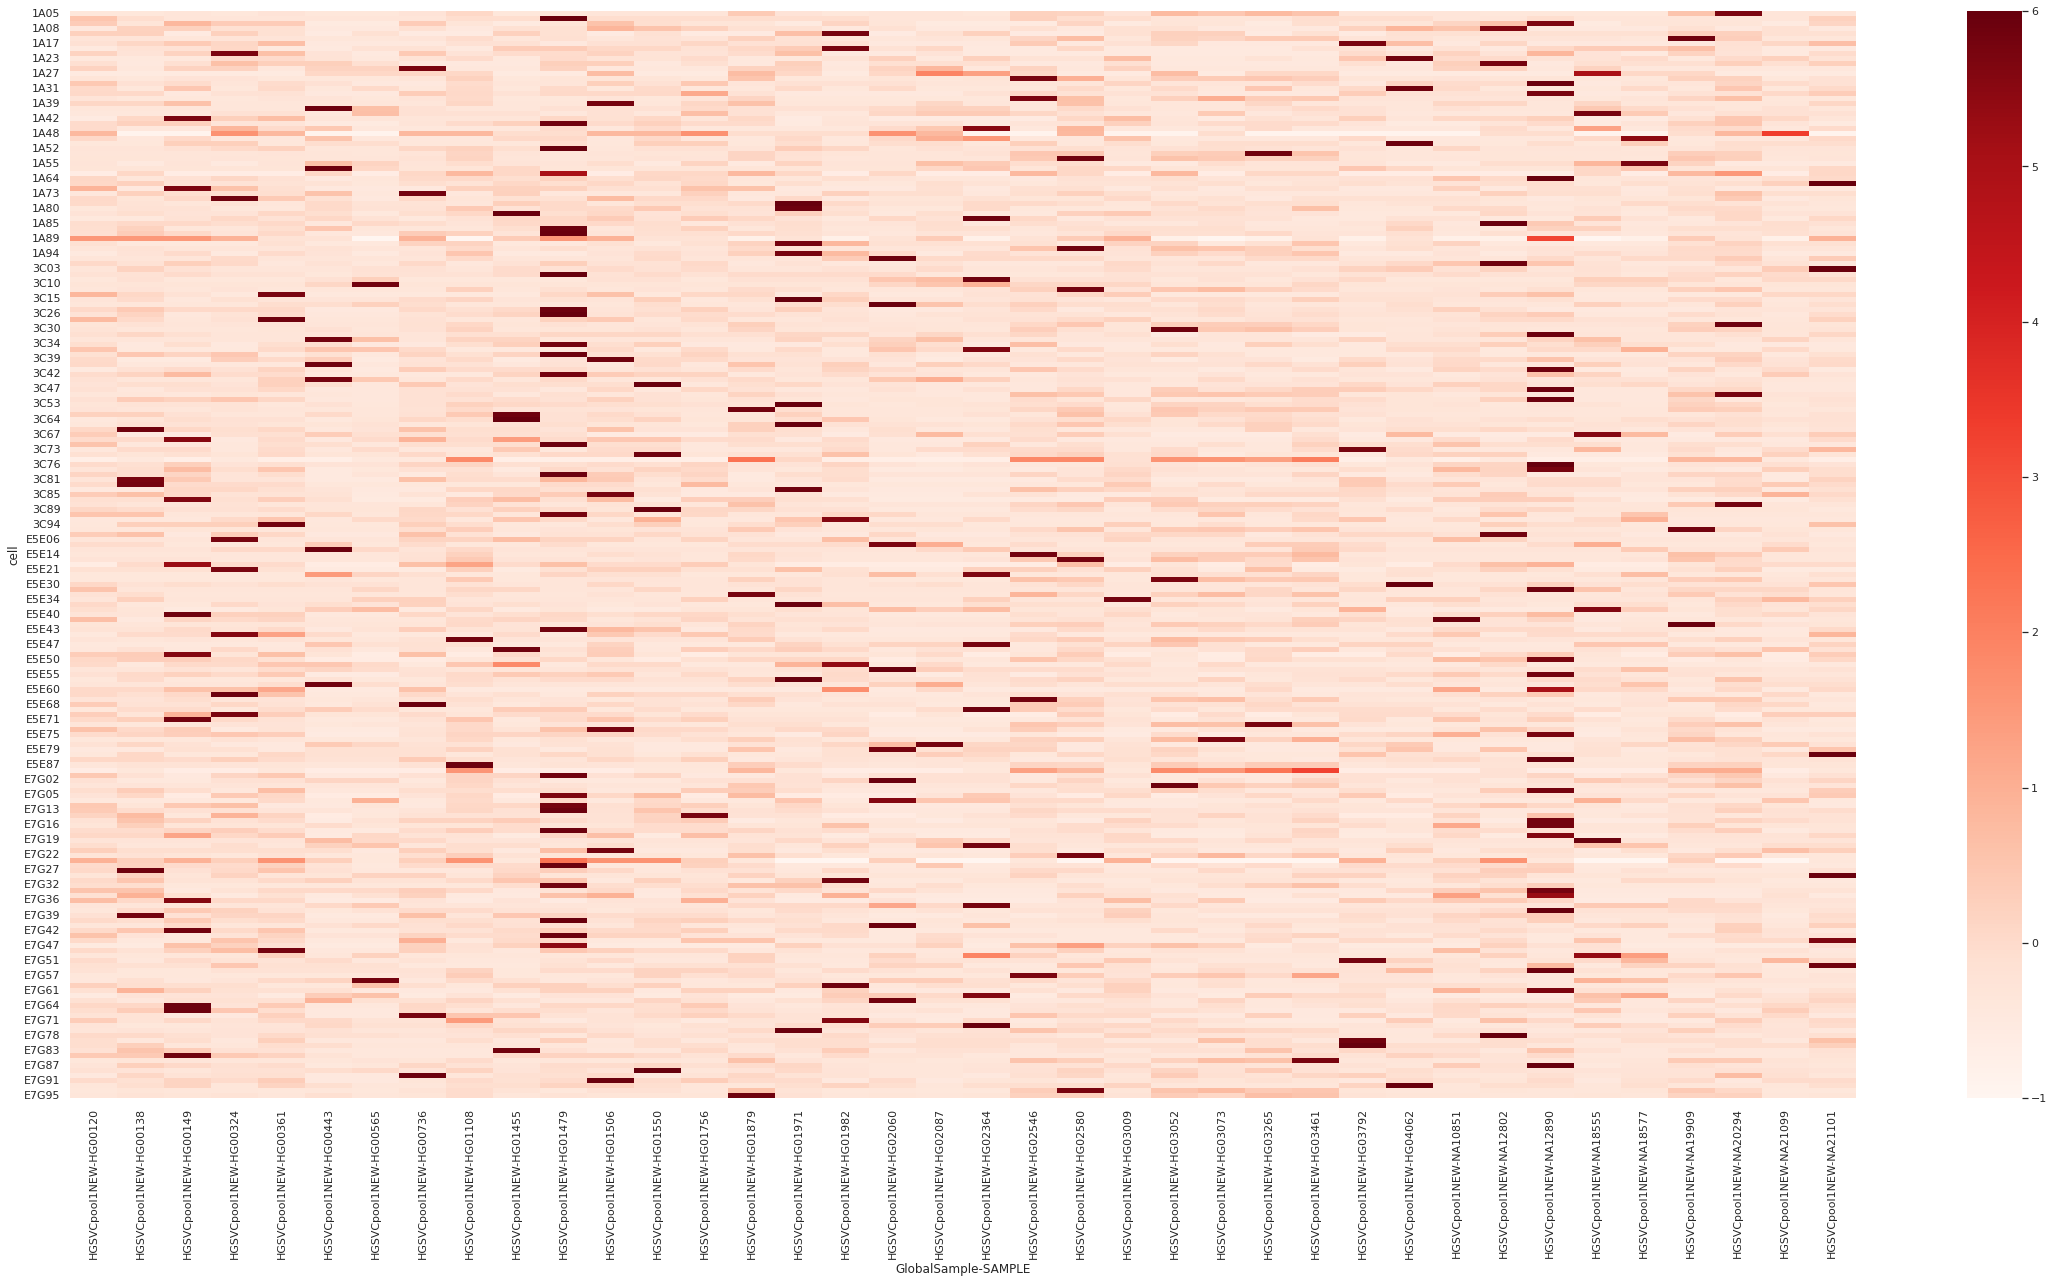

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(40,20))
ax = sns.heatmap(pivot_table_stats_zscore, cmap="Reds", vmin=-1, vmax=6)
#ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
#ax.set_xlabel("Sample")
#ax.set_ylabel("Cell Line")
ax.figure.savefig(f"{output_dir}/{sample}/heatmap_zscore_cell_per_sample.png")
ax

<Figure size 2880x1440 with 0 Axes>

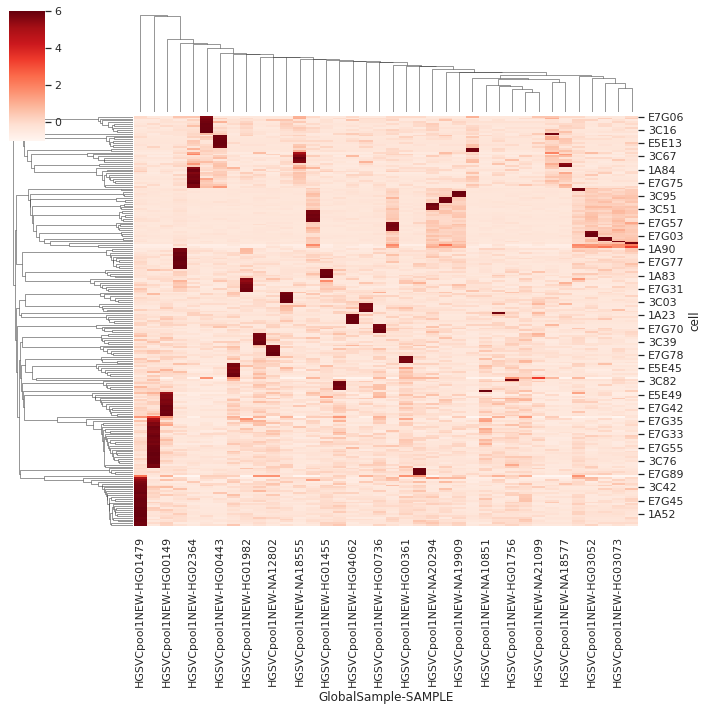

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(40,20))
ax = sns.clustermap(pivot_table_stats_zscore, cmap="Reds", vmin=-1, vmax=6)
#ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
#ax.set_xlabel("Sample")
#ax.set_ylabel("Cell Line")
ax.figure.savefig(f"{output_dir}/{sample}/clustermap_zscore_cell_per_sample.png")
ax

In [19]:
["-".join(e) for e in pivot_table_stats_zscore.columns]

['HGSVCpool1NEW-HG00120',
 'HGSVCpool1NEW-HG00138',
 'HGSVCpool1NEW-HG00149',
 'HGSVCpool1NEW-HG00324',
 'HGSVCpool1NEW-HG00361',
 'HGSVCpool1NEW-HG00443',
 'HGSVCpool1NEW-HG00565',
 'HGSVCpool1NEW-HG00736',
 'HGSVCpool1NEW-HG01108',
 'HGSVCpool1NEW-HG01455',
 'HGSVCpool1NEW-HG01479',
 'HGSVCpool1NEW-HG01506',
 'HGSVCpool1NEW-HG01550',
 'HGSVCpool1NEW-HG01756',
 'HGSVCpool1NEW-HG01879',
 'HGSVCpool1NEW-HG01971',
 'HGSVCpool1NEW-HG01982',
 'HGSVCpool1NEW-HG02060',
 'HGSVCpool1NEW-HG02087',
 'HGSVCpool1NEW-HG02364',
 'HGSVCpool1NEW-HG02546',
 'HGSVCpool1NEW-HG02580',
 'HGSVCpool1NEW-HG03009',
 'HGSVCpool1NEW-HG03052',
 'HGSVCpool1NEW-HG03073',
 'HGSVCpool1NEW-HG03265',
 'HGSVCpool1NEW-HG03461',
 'HGSVCpool1NEW-HG03792',
 'HGSVCpool1NEW-HG04062',
 'HGSVCpool1NEW-NA10851',
 'HGSVCpool1NEW-NA12802',
 'HGSVCpool1NEW-NA12890',
 'HGSVCpool1NEW-NA18555',
 'HGSVCpool1NEW-NA18577',
 'HGSVCpool1NEW-NA19909',
 'HGSVCpool1NEW-NA20294',
 'HGSVCpool1NEW-NA21099',
 'HGSVCpool1NEW-NA21101']

[Text(0.5, 0, 'HGSVCpool1NEW-HG00120'), Text(1.5, 0, 'HGSVCpool1NEW-HG00138'), Text(2.5, 0, 'HGSVCpool1NEW-HG00149'), Text(3.5, 0, 'HGSVCpool1NEW-HG00324'), Text(4.5, 0, 'HGSVCpool1NEW-HG00361'), Text(5.5, 0, 'HGSVCpool1NEW-HG00443'), Text(6.5, 0, 'HGSVCpool1NEW-HG00565'), Text(7.5, 0, 'HGSVCpool1NEW-HG00736'), Text(8.5, 0, 'HGSVCpool1NEW-HG01108'), Text(9.5, 0, 'HGSVCpool1NEW-HG01455'), Text(10.5, 0, 'HGSVCpool1NEW-HG01479'), Text(11.5, 0, 'HGSVCpool1NEW-HG01506'), Text(12.5, 0, 'HGSVCpool1NEW-HG01550'), Text(13.5, 0, 'HGSVCpool1NEW-HG01756'), Text(14.5, 0, 'HGSVCpool1NEW-HG01879'), Text(15.5, 0, 'HGSVCpool1NEW-HG01971'), Text(16.5, 0, 'HGSVCpool1NEW-HG01982'), Text(17.5, 0, 'HGSVCpool1NEW-HG02060'), Text(18.5, 0, 'HGSVCpool1NEW-HG02087'), Text(19.5, 0, 'HGSVCpool1NEW-HG02364'), Text(20.5, 0, 'HGSVCpool1NEW-HG02546'), Text(21.5, 0, 'HGSVCpool1NEW-HG02580'), Text(22.5, 0, 'HGSVCpool1NEW-HG03009'), Text(23.5, 0, 'HGSVCpool1NEW-HG03052'), Text(24.5, 0, 'HGSVCpool1NEW-HG03073'), Text(25.5

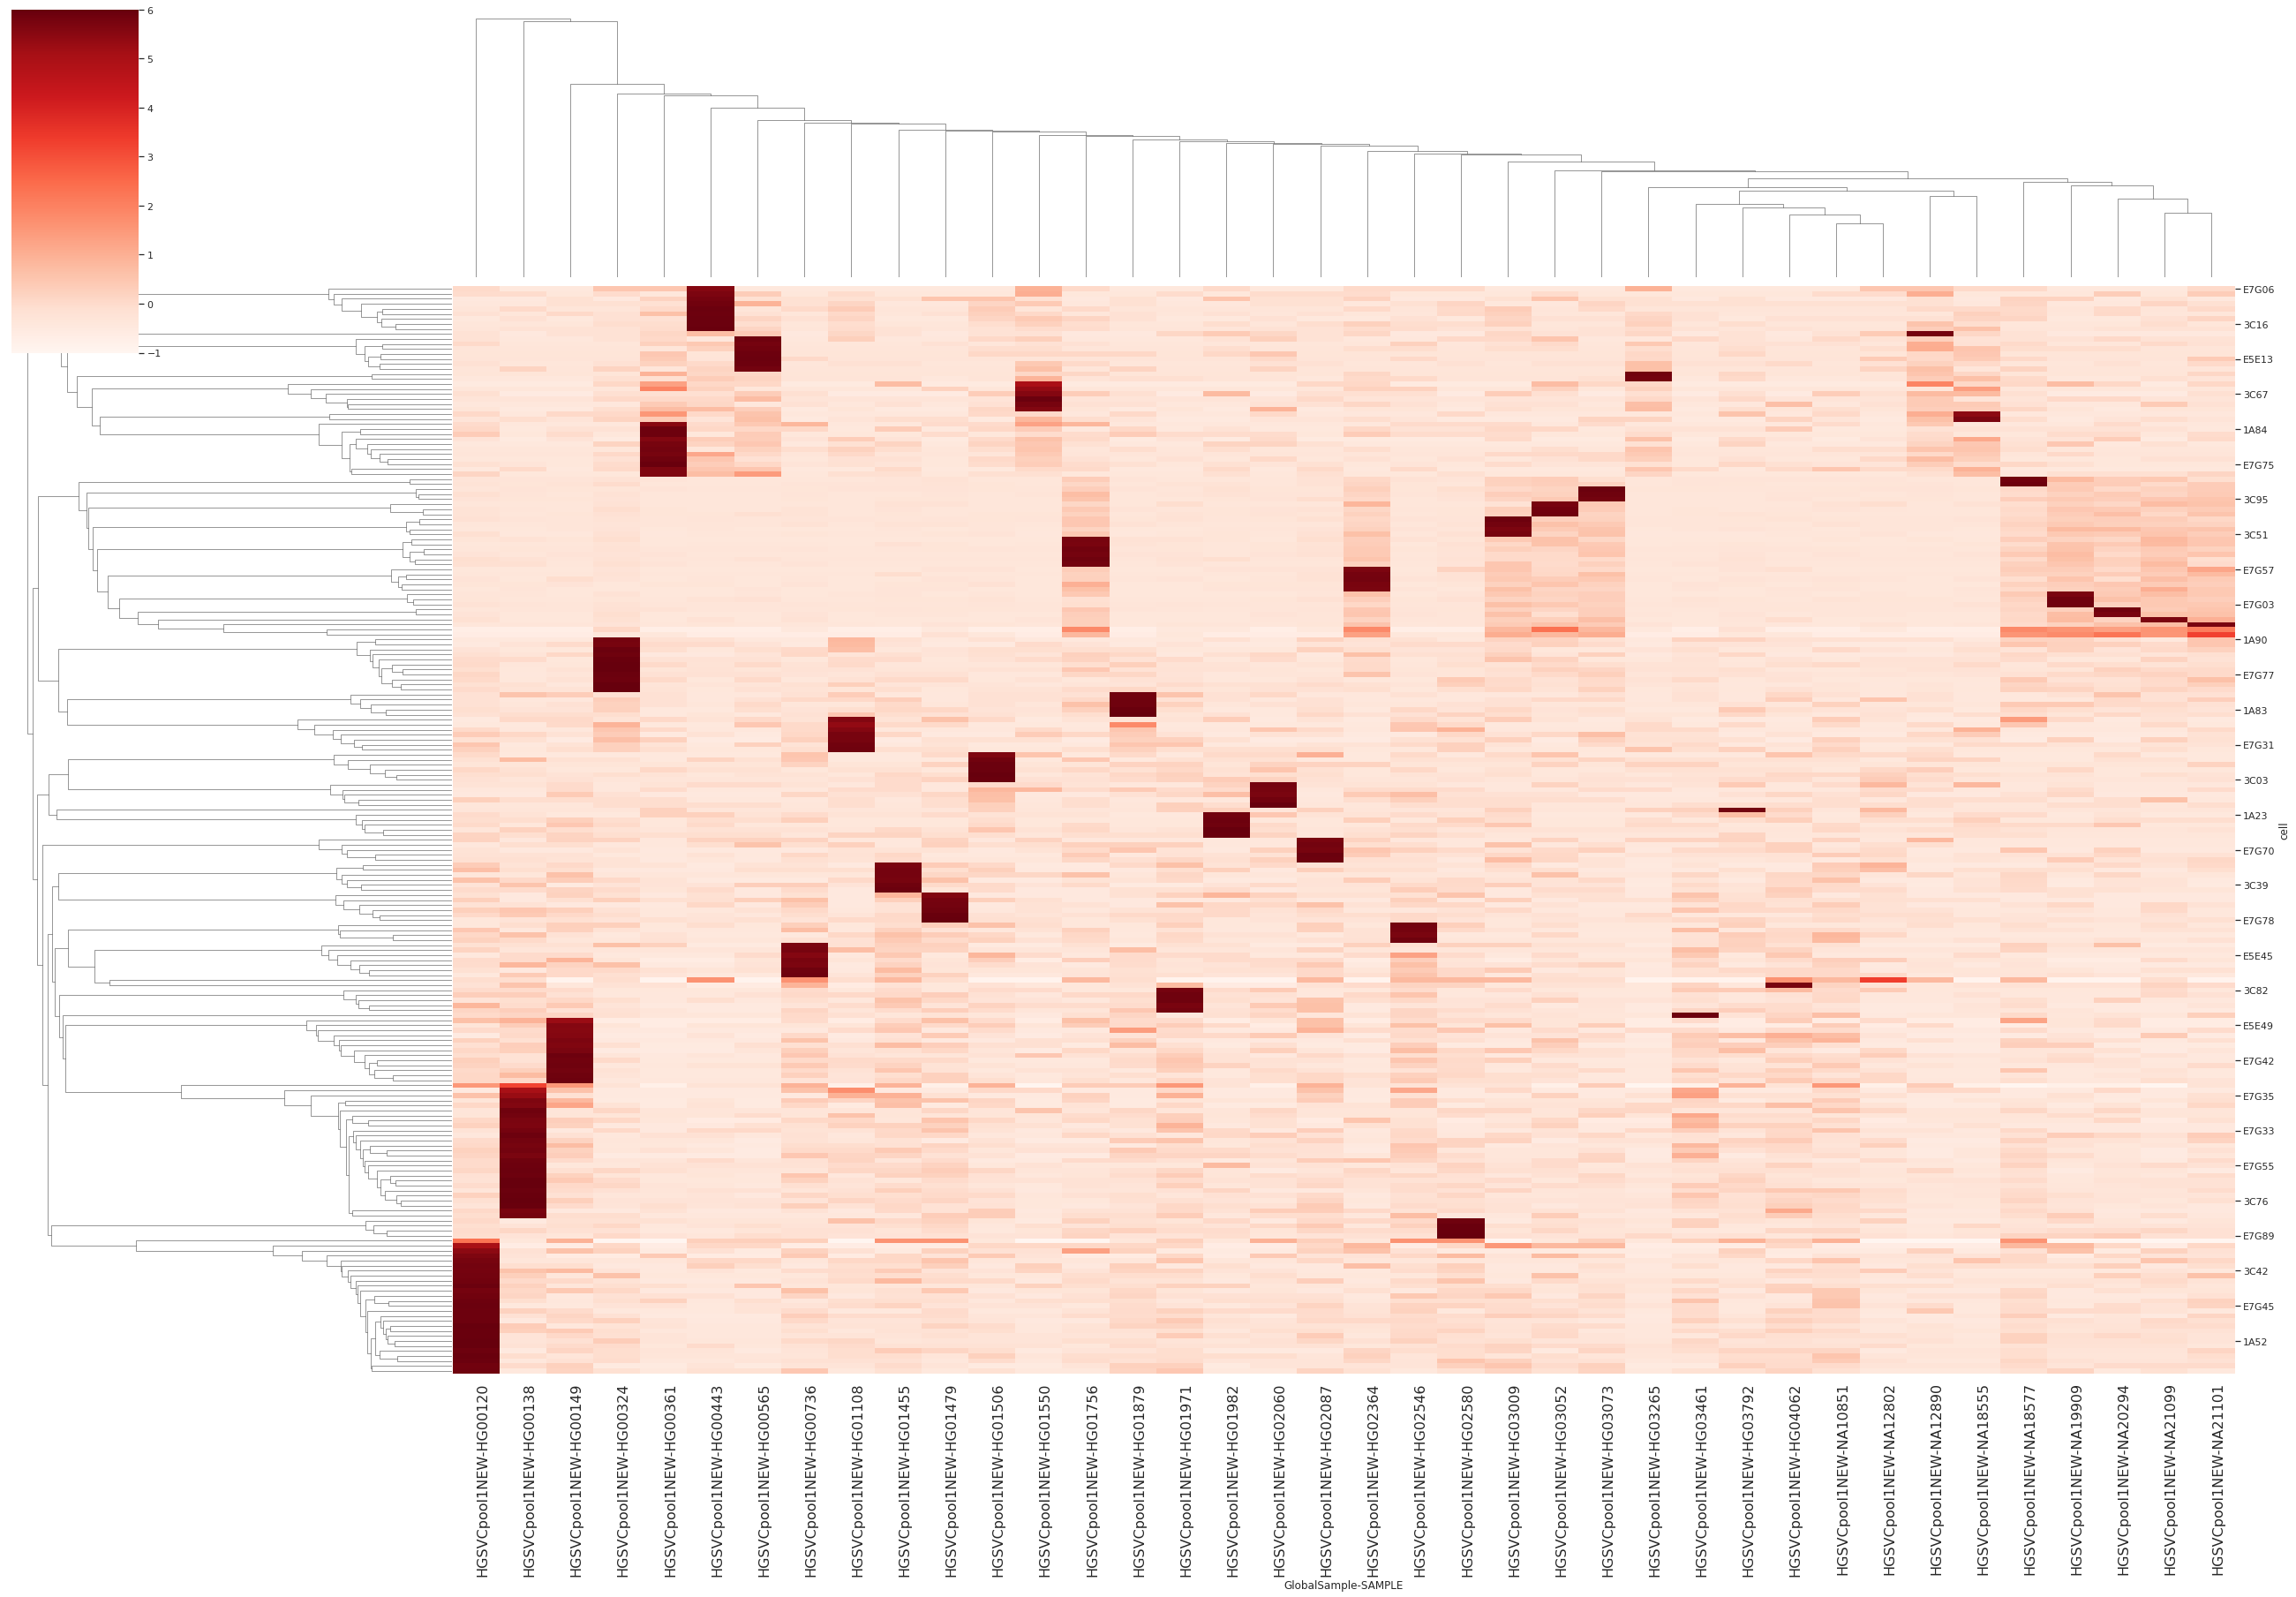

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# Assuming pivot_table_stats_zscore is your data

# Create the clustermap
ax = sns.clustermap(pivot_table_stats_zscore, cmap="Reds", vmin=-1, vmax=6)

# Set the size of the figure
width, height = 40, 30  # You can adjust these values as needed
ax.fig.set_size_inches(width, height)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor", fontsize=10)  # Adjust fontsize as needed

# Get the number of labels (assuming they are the same as the number of columns in your data)
num_labels = pivot_table_stats_zscore.shape[1]

# Set the x-tick labels manually
ax.ax_heatmap.set_xticks([x+0.5 for x in range(num_labels)])
ax.ax_heatmap.set_xticklabels(["-".join(e) for e in pivot_table_stats_zscore.columns], rotation=90,  ha='right', rotation_mode='anchor', fontsize=16 )
print(ax.ax_heatmap.get_xticklabels())

# Save the figure
output_file = f"{output_dir}/{sample}/clustermap_zscore_cell_per_sample.png"
ax.savefig(output_file)

#ax.set_title("Matched SNP nb in PseudoPool (z-score adjusted)")
#ax.set_xlabel("Sample")
#ax.set_ylabel("Cell Line")
#ax.figure.savefig(f"{output_dir}/{sample}/clustermap_zscore_cell_per_sample.png")
ax

In [21]:
pivot_table_stats_zscore

GlobalSample HGSVCpool1NEW                                                    \
SAMPLE             HG00120   HG00138   HG00149   HG00324   HG00361   HG00443   
cell                                                                           
1A05             -0.396384 -0.396384 -0.318340 -0.396384 -0.240295 -0.396384   
1A06              0.526569 -0.045134 -0.330986 -0.330986 -0.330986 -0.330986   
1A07              0.365336 -0.295748  0.806058  0.365336  0.365336 -0.516109   
1A08             -0.473952  0.205677  0.205677 -0.134137 -0.134137 -0.473952   
1A14              0.248815  0.248815 -0.539099  0.248815 -0.145142 -0.539099   
...                    ...       ...       ...       ...       ...       ...   
E7G90            -0.459408  0.118655 -0.228183 -0.112570 -0.112570 -0.459408   
E7G91             0.004109 -0.152016  0.160234  0.004109  0.316359 -0.464266   
E7G93            -0.360729 -0.097119  0.166490 -0.360729  0.166490 -0.097119   
E7G94            -0.396499 -0.307608 -0.352054 -0.352054 -0.396499 -0.352054   
E7G95            -0.359752 -0.231390 -0.295571 -0.231390 -0.359752 -0.103027   

GlobalSample                                                              \
SAMPLE         HG00565   HG00736   HG01108   HG01455   HG01479   HG01506   
cell                                                                       
1A05         -0.396384 -0.240295  0.071883 -0.396384 -0.396384 -0.318340   
1A06         -0.330986 -0.330986 -0.045134 -0.045134  5.957751 -0.045134   
1A07         -0.516109  0.365336 -0.295748 -0.516109 -0.295748  0.585697   
1A08         -0.473952 -0.134137 -0.473952 -0.134137 -0.134137  0.885306   
1A14         -0.145142 -0.539099 -0.539099  0.248815 -0.145142 -0.539099   
...                ...       ...       ...       ...       ...       ...   
E7G90        -0.459408  5.899288 -0.343796 -0.112570 -0.112570  0.003042   
E7G91        -0.464266 -0.308141  0.004109 -0.152016  0.004109  5.936858   
E7G93        -0.360729 -0.360729 -0.097119 -0.097119  0.166490  0.166490   
E7G94        -0.396499 -0.218718 -0.040936 -0.218718 -0.396499 -0.174272   
E7G95        -0.359752 -0.295571 -0.038846 -0.359752 -0.231390 -0.295571   

GlobalSample                                                              \
SAMPLE         HG01550   HG01756   HG01879   HG01971   HG01982   HG02060   
cell                                                                       
1A05         -0.318340 -0.318340  0.384061 -0.240295 -0.396384 -0.318340   
1A06         -0.045134 -0.045134 -0.045134 -0.045134 -0.045134 -0.330986   
1A07         -0.075387 -0.295748 -0.295748 -0.516109  0.144974 -0.295748   
1A08          0.545491  0.205677 -0.134137 -0.134137 -0.473952 -0.134137   
1A14         -0.145142 -0.539099 -0.539099  0.642772  5.764212 -0.539099   
...                ...       ...       ...       ...       ...       ...   
E7G90        -0.459408 -0.228183  0.118655 -0.228183 -0.228183 -0.343796   
E7G91         0.004109  0.316359  0.004109  0.004109 -0.464266  0.004109   
E7G93        -0.097119 -0.360729 -0.360729 -0.097119  0.166490 -0.097119   
E7G94        -0.174272 -0.352054  0.581298 -0.218718 -0.396499 -0.352054   
E7G95        -0.295571 -0.295571  5.865809 -0.167208 -0.359752 -0.295571   

GlobalSample                                                              \
SAMPLE         HG02087   HG02364   HG02546   HG02580   HG03009   HG03052   
cell                                                                       
1A05         -0.318340 -0.396384  0.227972  0.149928 -0.240295  0.774284   
1A06         -0.330986 -0.330986  0.240717 -0.045134 -0.045134 -0.330986   
1A07         -0.516109 -0.516109 -0.516109  0.144974 -0.516109 -0.295748   
1A08         -0.473952 -0.473952 -0.134137 -0.473952 -0.134137 -0.134137   
1A14         -0.145142  0.248815 -0.539099 -0.539099 -0.145142  0.248815   
...                ...       ...       ...       ...       ...       ...   
E7G90        -0.343796 -0.459408 -0.112570  0.118655 -0.343796  0

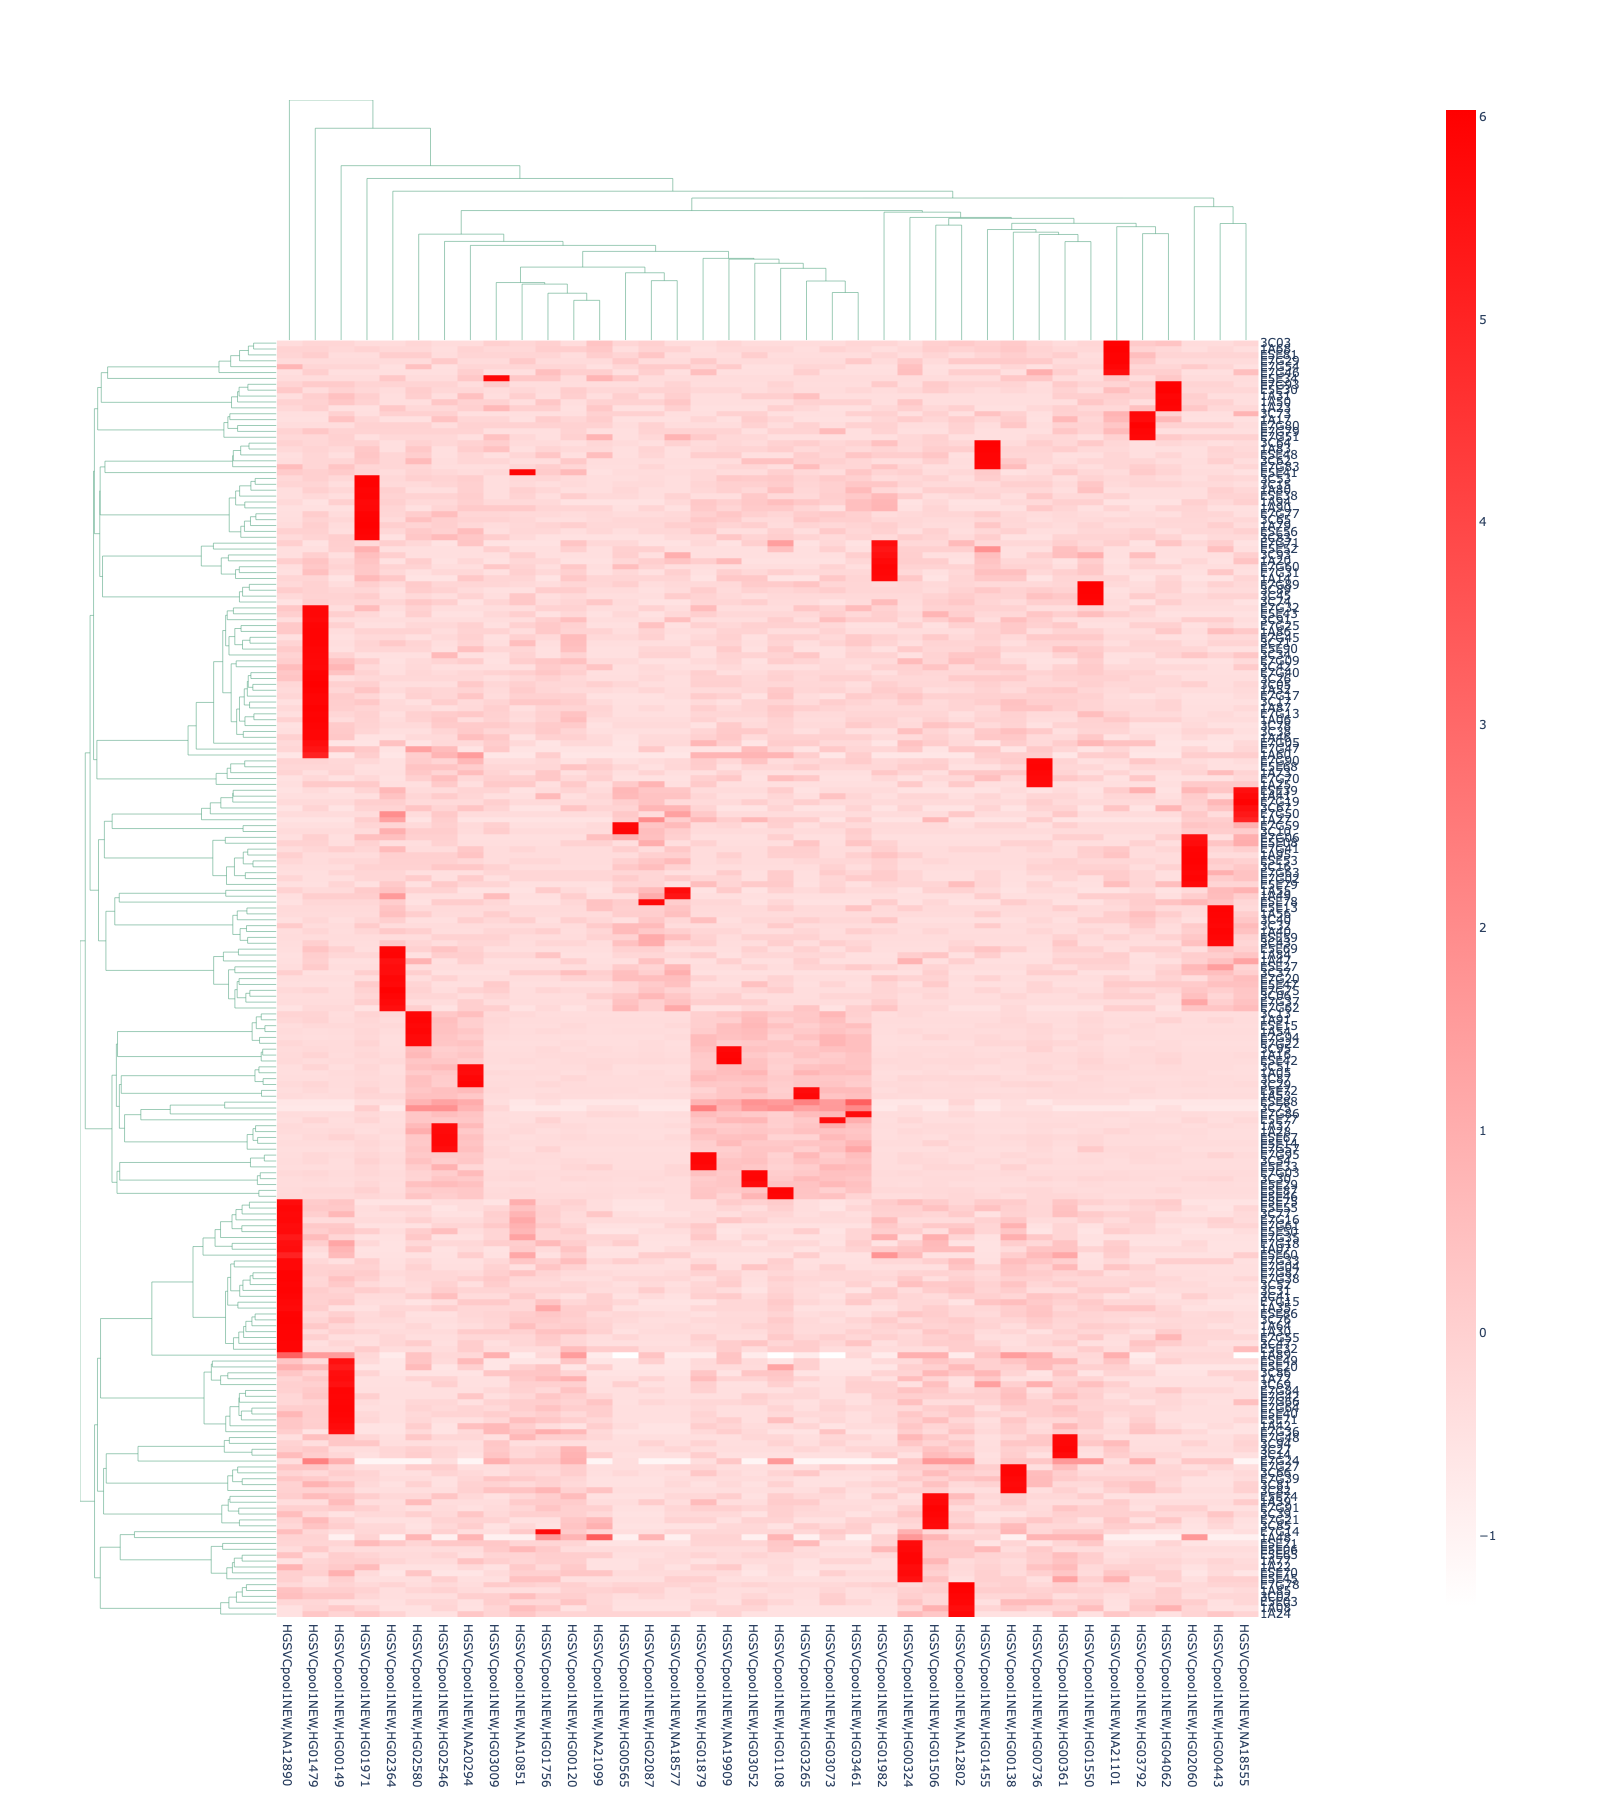

In [22]:
import dash_bio

f = dash_bio.Clustergram(
        data=pivot_table_stats_zscore.values,
        column_labels=pivot_table_stats_zscore.columns.tolist(),
        row_labels=pivot_table_stats_zscore.index.tolist(),
        color_threshold={
            'row': 150,
            'col': 700
        },
        height=1800,
        width=1700,
        color_map=['white', 'red'],
        display_range=[-1, 6],
    
    )


f.write_html(f"{output_dir}/{sample}/clustermap_zscore_cell_per_sample_interactive.html")
f

In [23]:
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore.copy()
pivot_table_stats_zscore_wt_multiindex.columns = pivot_table_stats_zscore.columns.droplevel()
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore_wt_multiindex.reset_index().rename({"index":"cell"}, axis=1)
pivot_table_stats_zscore_wt_multiindex.head()                   

SAMPLE  cell   HG00120   HG00138   HG00149   HG00324   HG00361   HG00443  \
0       1A05 -0.396384 -0.396384 -0.318340 -0.396384 -0.240295 -0.396384   
1       1A06  0.526569 -0.045134 -0.330986 -0.330986 -0.330986 -0.330986   
2       1A07  0.365336 -0.295748  0.806058  0.365336  0.365336 -0.516109   
3       1A08 -0.473952  0.205677  0.205677 -0.134137 -0.134137 -0.473952   
4       1A14  0.248815  0.248815 -0.539099  0.248815 -0.145142 -0.539099   

SAMPLE   HG00565   HG00736   HG01108   HG01455   HG01479   HG01506   HG01550  \
0      -0.396384 -0.240295  0.071883 -0.396384 -0.396384 -0.318340 -0.318340   
1      -0.330986 -0.330986 -0.045134 -0.045134  5.957751 -0.045134 -0.045134   
2      -0.516109  0.365336 -0.295748 -0.516109 -0.295748  0.585697 -0.075387   
3      -0.473952 -0.134137 -0.473952 -0.134137 -0.134137  0.885306  0.545491   
4      -0.145142 -0.539099 -0.539099  0.248815 -0.145142 -0.539099 -0.145142   

SAMPLE   HG01756   HG01879   HG01971   HG01982   HG02060   HG02087   HG02364  \
0      -0.318340  0.384061 -0.240295 -0.396384 -0.318340 -0.318340 -0.396384   
1      -0.045134 -0.045134 -0.045134 -0.045134 -0.330986 -0.330986 -0.330986   
2      -0.295748 -0.295748 -0.516109  0.144974 -0.295748 -0.516109 -0.516109   
3       0.205677 -0.134137 -0.134137 -0.473952 -0.134137 -0.473952 -0.473952   
4      -0.539099 -0.539099  0.642772  5.764212 -0.539099 -0.145142  0.248815   

SAMPLE   HG02546   HG02580   HG03009   HG03052   HG03073   HG03265   HG03461  \
0       0.227972  0.149928 -0.240295  0.774284  0.462106  0.774284  0.540150   
1       0.240717 -0.045134 -0.045134 -0.330986 -0.330986 -0.330986 -0.045134   
2      -0.516109  0.144974 -0.516109 -0.295748 -0.295748 -0.516109 -0.075387   
3      -0.134137 -0.473952 -0.134137 -0.134137 -0.473952 -0.473952 -0.473952   
4      -0.539099 -0.539099 -0.145142  0.248815  0.248815 -0.539099 -0.145142   

SAMPLE   HG03792   HG04062   NA10851   NA12802   NA12890   NA18555   NA18577  \
0      -0.318340 -0.318340 -0.318340 -0.396384 -0.396384 -0.396384 -0.396384   
1      -0.045134 -0.045134 -0.330986 -0.330986 -0.045134 -0.330986 -0.330986   
2      -0.295748 -0.295748  0.144974  0.585697  5.654003 -0.516109 -0.295748   
3       0.205677  0.885306  0.545491  5.642707 -0.473952 -0.473952 -0.473952   
4      -0.539099 -0.145142 -0.145142 -0.145142 -0.145142 -0.145142 -0.145142   

SAMPLE   NA19909   NA20294   NA21099   NA21101  
0       0.540150  5.691090 -0.318340 -0.318340  
1      -0.330986 -0.330986 -0.330986  0.240717  
2      -0.295748 -0.295748 -0.516109  0.144974  
3      -0.134137 -0.473952 -0.134137 -0.473952  
4       0.248815  0.248815 -0.145142 -0.145142

In [24]:
#pivot_table_stats_zscore.melt()
melt_df = pd.melt(pivot_table_stats_zscore_wt_multiindex, id_vars=['cell'], value_vars=[e for e in pivot_table_stats_zscore_wt_multiindex.columns if e not in ["cell"]])
melt_df.head()

cell   SAMPLE     value
0  1A05  HG00120 -0.396384
1  1A06  HG00120  0.526569
2  1A07  HG00120  0.365336
3  1A08  HG00120 -0.473952
4  1A14  HG00120  0.248815

In [25]:
def top_n_samples(group, n=3):
    return group.sort_values(by='ID', ascending=False).head(n)


# tmp_debug = gb_sample_count_stats.loc[(gb_sample_count_stats["sample"] == "GM19836x01") & (gb_sample_count_stats["prediction"] == 1)].sort_values(by=["cell", "ID"], ascending=[True, False])
pd.options.display.max_rows = None
gb_sample_count_stats
tmp_debug = gb_sample_count_stats.groupby('cell').apply(top_n_samples, n=3).reset_index(drop=True)
tmp_debug = pd.merge(tmp_debug, melt_df, on=["cell", "SAMPLE"], how="inner")
tmp_debug[["cell", "SAMPLE", "ID", "value", "probability", "good"]]
tmp_debug.head(100)
tmp_debug.to_excel(f"{output_dir}/{sample}/debug.xlsx", index=False)

# # Generate a color for each unique cell
# unique_cells = tmp_debug['cell'].unique()
# colors = [f"background-color: rgb({200 + i*20 % 55}, {220 - (i*20) % 55}, {200 + (i*30) % 55})" for i in range(len(unique_cells))]
# color_map = dict(zip(unique_cells, colors))

# # Apply the colors
# def apply_row_colors(row):
#     return [color_map[row['cell']]] * len(row)

# styled_df = tmp_debug.drop(["bam"], axis=1).style.apply(apply_row_colors, axis=1)

# # Display the styled DataFrame in Jupyter Notebook
# styled_df


In [26]:
tmp_debug.SAMPLE.nunique()

38

In [27]:

# Rpy2

%load_ext rpy2.ipython 


In [28]:
metadata = pd.read_csv("../20130606_g1k_3202_samples_ped_population.txt", sep=" ")
metadata.head()

FamilyID SampleID FatherID MotherID  Sex Population Superpopulation
0  HG00096  HG00096        0        0    1        GBR             EUR
1  HG00097  HG00097        0        0    2        GBR             EUR
2  HG00099  HG00099        0        0    2        GBR             EUR
3  HG00100  HG00100        0        0    2        GBR             EUR
4  HG00101  HG00101        0        0    1        GBR             EUR

In [29]:
pivot_table_stats_zscore.head()

GlobalSample HGSVCpool1NEW                                                    \
SAMPLE             HG00120   HG00138   HG00149   HG00324   HG00361   HG00443   
cell                                                                           
1A05             -0.396384 -0.396384 -0.318340 -0.396384 -0.240295 -0.396384   
1A06              0.526569 -0.045134 -0.330986 -0.330986 -0.330986 -0.330986   
1A07              0.365336 -0.295748  0.806058  0.365336  0.365336 -0.516109   
1A08             -0.473952  0.205677  0.205677 -0.134137 -0.134137 -0.473952   
1A14              0.248815  0.248815 -0.539099  0.248815 -0.145142 -0.539099   

GlobalSample                                                              \
SAMPLE         HG00565   HG00736   HG01108   HG01455   HG01479   HG01506   
cell                                                                       
1A05         -0.396384 -0.240295  0.071883 -0.396384 -0.396384 -0.318340   
1A06         -0.330986 -0.330986 -0.045134 -0.045134  5.957751 -0.045134   
1A07         -0.516109  0.365336 -0.295748 -0.516109 -0.295748  0.585697   
1A08         -0.473952 -0.134137 -0.473952 -0.134137 -0.134137  0.885306   
1A14         -0.145142 -0.539099 -0.539099  0.248815 -0.145142 -0.539099   

GlobalSample                                                              \
SAMPLE         HG01550   HG01756   HG01879   HG01971   HG01982   HG02060   
cell                                                                       
1A05         -0.318340 -0.318340  0.384061 -0.240295 -0.396384 -0.318340   
1A06         -0.045134 -0.045134 -0.045134 -0.045134 -0.045134 -0.330986   
1A07         -0.075387 -0.295748 -0.295748 -0.516109  0.144974 -0.295748   
1A08          0.545491  0.205677 -0.134137 -0.134137 -0.473952 -0.134137   
1A14         -0.145142 -0.539099 -0.539099  0.642772  5.764212 -0.539099   

GlobalSample                                                              \
SAMPLE         HG02087   HG02364   HG02546   HG02580   HG03009   HG03052   
cell                                                                       
1A05         -0.318340 -0.396384  0.227972  0.149928 -0.240295  0.774284   
1A06         -0.330986 -0.330986  0.240717 -0.045134 -0.045134 -0.330986   
1A07         -0.516109 -0.516109 -0.516109  0.144974 -0.516109 -0.295748   
1A08         -0.473952 -0.473952 -0.134137 -0.473952 -0.134137 -0.134137   
1A14         -0.145142  0.248815 -0.539099 -0.539099 -0.145142  0.248815   

GlobalSample                                                              \
SAMPLE         HG03073   HG03265   HG03461   HG03792   HG04062   NA10851   
cell                                                                       
1A05          0.462106  0.774284  0.540150 -0.318340 -0.318340 -0.318340   
1A06         -0.330986 -0.330986 -0.045134 -0.045134 -0.045134 -0.330986   
1A07         -0.295748 -0.516109 -0.075387 -0.295748 -0.295748  0.144974   
1A08         -0.473952 -0.473952 -0.473952  0.205677  0.885306  0.545491   
1A14          0.248815 -0.539099 -0.145142 -0.539099 -0.145142 -0.145142   

GlobalSample                                                              \
SAMPLE         NA12802   NA12890   NA18555   NA18577   NA19909   NA20294   
cell                                                                       
1A05         -0.396384 -0.396384 -0.396384 -0.396384  0.540150  5.691090   
1A06         -0.330986 -0.045134 -0.330986 -0.330986 -0.330986 -0.330986   
1A07          0.585697  5.654003 -0.516109 -0.295748 -0.295748 -0.295748   
1A08          5.642707 -0.473952 -0.473952 -0.473952 -0.134137 -0.473952   
1A14         -0.145142 -0.145142 -0.145142 -0.145142  0.248815  0.248815   

GlobalSample                      
SAMPLE         NA21099   NA21101  
cell                              
1A05         -0.318340 -0.318340  
1A06         -0.330986  0.240717  
1A07         -0.516109  0.144974  
1A08         -0.134137 -0.473952  
1A14         -0.145142 -0.145142

In [30]:
pivot_table_stats_zscore_wt_multiindex = pivot_table_stats_zscore_wt_multiindex.set_index("cell")
pivot_table_stats_zscore_wt_multiindex.head()

SAMPLE   HG00120   HG00138   HG00149   HG00324   HG00361   HG00443   HG00565  \
cell                                                                           
1A05   -0.396384 -0.396384 -0.318340 -0.396384 -0.240295 -0.396384 -0.396384   
1A06    0.526569 -0.045134 -0.330986 -0.330986 -0.330986 -0.330986 -0.330986   
1A07    0.365336 -0.295748  0.806058  0.365336  0.365336 -0.516109 -0.516109   
1A08   -0.473952  0.205677  0.205677 -0.134137 -0.134137 -0.473952 -0.473952   
1A14    0.248815  0.248815 -0.539099  0.248815 -0.145142 -0.539099 -0.145142   

SAMPLE   HG00736   HG01108   HG01455   HG01479   HG01506   HG01550   HG01756  \
cell                                                                           
1A05   -0.240295  0.071883 -0.396384 -0.396384 -0.318340 -0.318340 -0.318340   
1A06   -0.330986 -0.045134 -0.045134  5.957751 -0.045134 -0.045134 -0.045134   
1A07    0.365336 -0.295748 -0.516109 -0.295748  0.585697 -0.075387 -0.295748   
1A08   -0.134137 -0.473952 -0.134137 -0.134137  0.885306  0.545491  0.205677   
1A14   -0.539099 -0.539099  0.248815 -0.145142 -0.539099 -0.145142 -0.539099   

SAMPLE   HG01879   HG01971   HG01982   HG02060   HG02087   HG02364   HG02546  \
cell                                                                           
1A05    0.384061 -0.240295 -0.396384 -0.318340 -0.318340 -0.396384  0.227972   
1A06   -0.045134 -0.045134 -0.045134 -0.330986 -0.330986 -0.330986  0.240717   
1A07   -0.295748 -0.516109  0.144974 -0.295748 -0.516109 -0.516109 -0.516109   
1A08   -0.134137 -0.134137 -0.473952 -0.134137 -0.473952 -0.473952 -0.134137   
1A14   -0.539099  0.642772  5.764212 -0.539099 -0.145142  0.248815 -0.539099   

SAMPLE   HG02580   HG03009   HG03052   HG03073   HG03265   HG03461   HG03792  \
cell                                                                           
1A05    0.149928 -0.240295  0.774284  0.462106  0.774284  0.540150 -0.318340   
1A06   -0.045134 -0.045134 -0.330986 -0.330986 -0.330986 -0.045134 -0.045134   
1A07    0.144974 -0.516109 -0.295748 -0.295748 -0.516109 -0.075387 -0.295748   
1A08   -0.473952 -0.134137 -0.134137 -0.473952 -0.473952 -0.473952  0.205677   
1A14   -0.539099 -0.145142  0.248815  0.248815 -0.539099 -0.145142 -0.539099   

SAMPLE   HG04062   NA10851   NA12802   NA12890   NA18555   NA18577   NA19909  \
cell                                                                           
1A05   -0.318340 -0.318340 -0.396384 -0.396384 -0.396384 -0.396384  0.540150   
1A06   -0.045134 -0.330986 -0.330986 -0.045134 -0.330986 -0.330986 -0.330986   
1A07   -0.295748  0.144974  0.585697  5.654003 -0.516109 -0.295748 -0.295748   
1A08    0.885306  0.545491  5.642707 -0.473952 -0.473952 -0.473952 -0.134137   
1A14   -0.145142 -0.145142 -0.145142 -0.145142 -0.145142 -0.145142  0.248815   

SAMPLE   NA20294   NA21099   NA21101  
cell                                  
1A05    5.691090 -0.318340 -0.318340  
1A06   -0.330986 -0.330986  0.240717  
1A07   -0.295748 -0.516109  0.144974  
1A08   -0.473952 -0.134137 -0.473952  
1A14    0.248815 -0.145142 -0.145142

R[write to console]: Loading required package: grid

R[write to console]: ========================================
ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


R[write to console]: ========================================
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circl

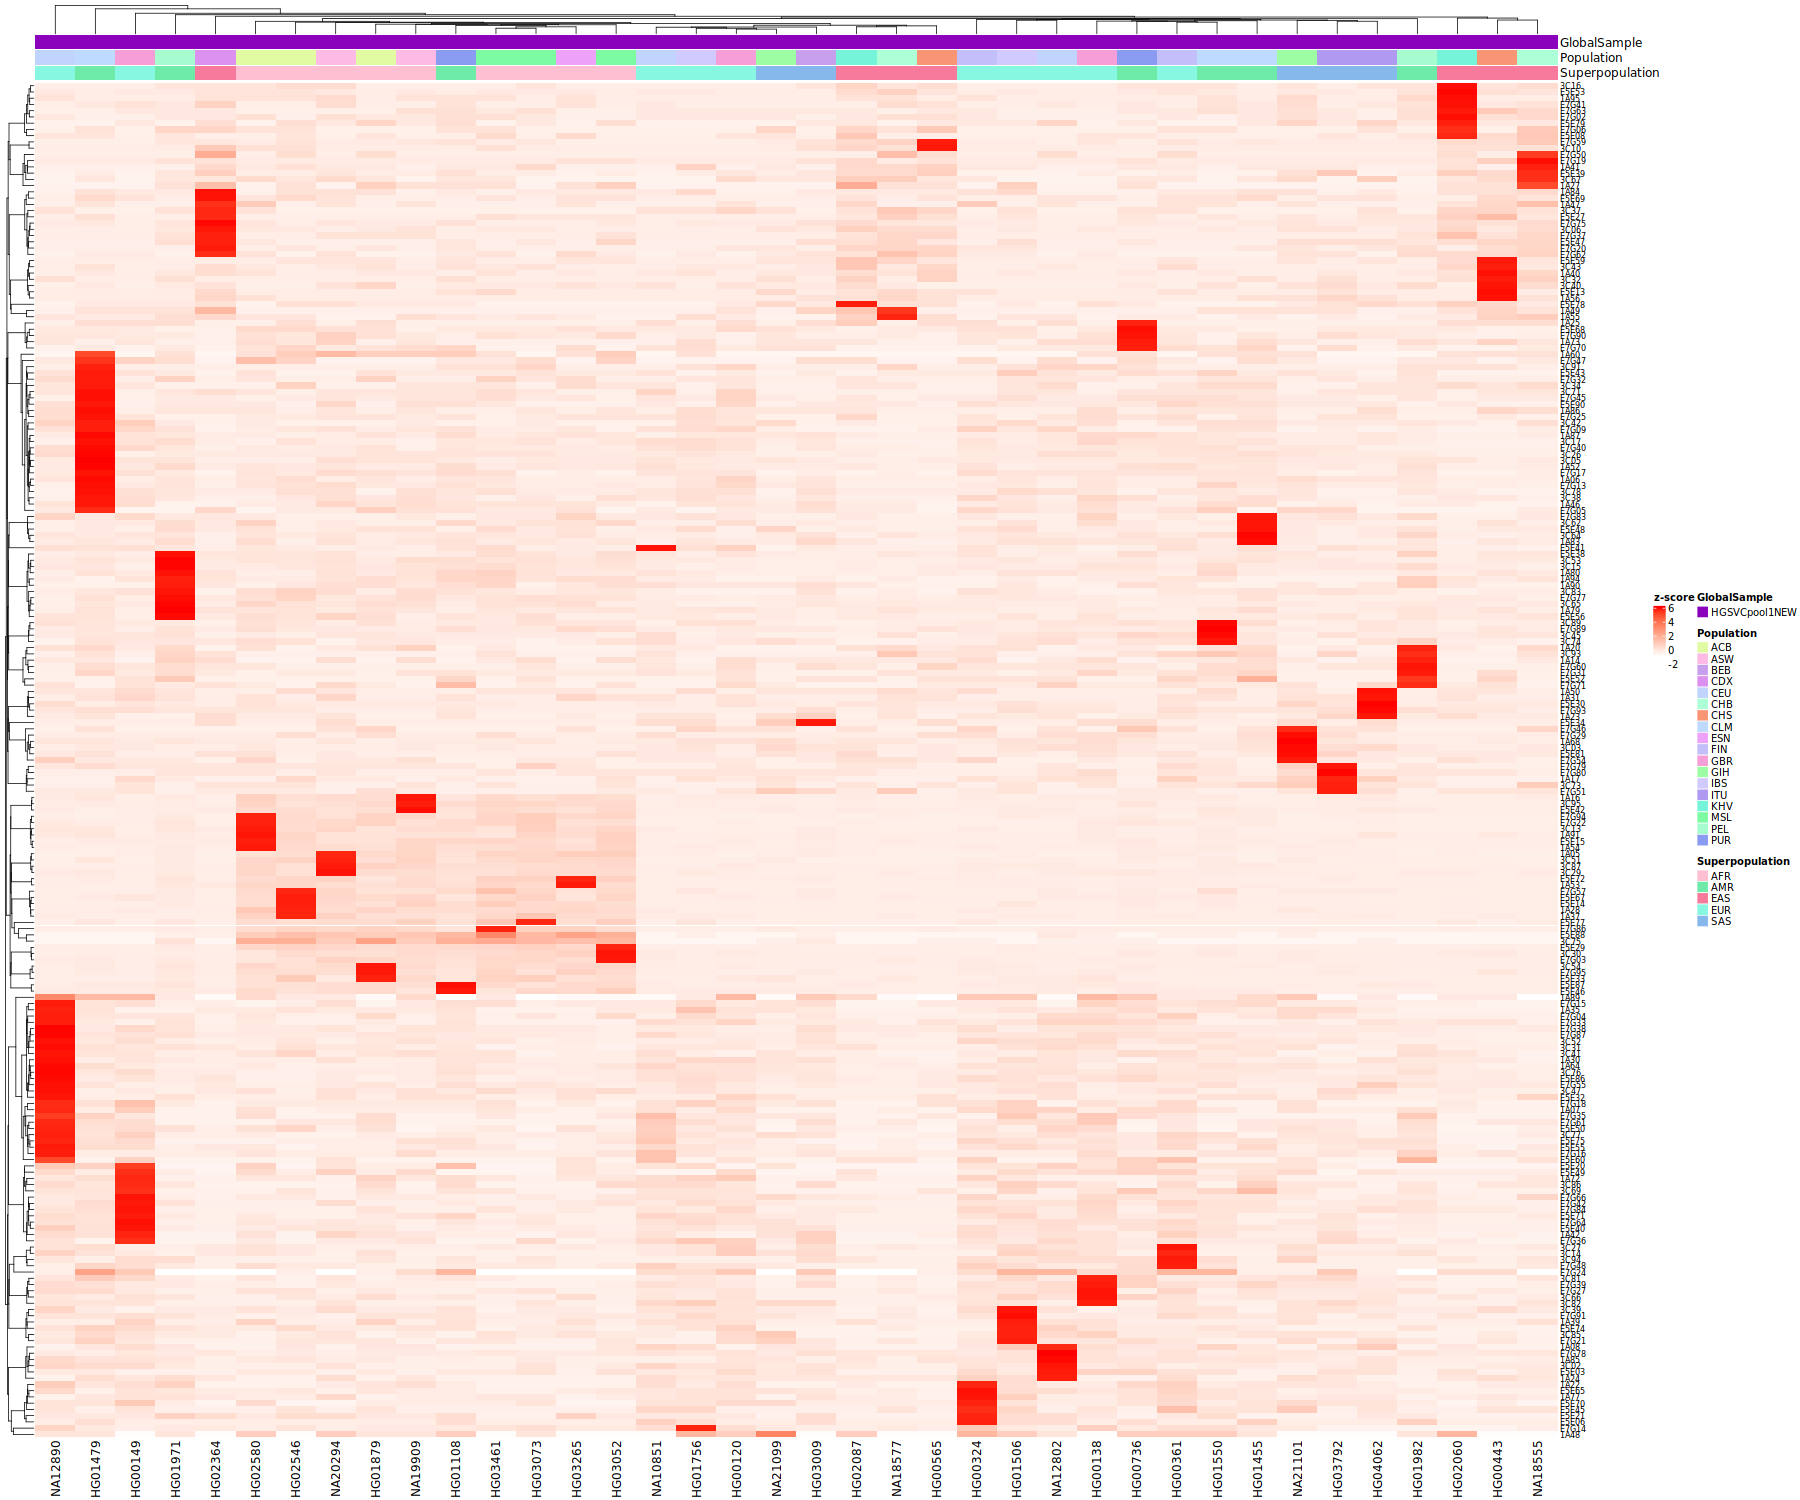

In [31]:
%%R -i pivot_table_stats_zscore_wt_multiindex -i metadata -i ref_count -w 1800 -h 1500
library(ComplexHeatmap)
library(circlize)

set.seed(123) # for reproducibility
ordered_metadata <- metadata[match(colnames(pivot_table_stats_zscore_wt_multiindex), metadata$SampleID), ]

# Map GlobalSample to the SAMPLE in pivot_table_stats_zscore
global_sample_annotation <- ref_count[match(colnames(pivot_table_stats_zscore_wt_multiindex), ref_count$SAMPLE), "GlobalSample"]


# Create HeatmapAnnotation objects for Population, Superpopulation, and GlobalSample
col_annotation <- HeatmapAnnotation(df = ordered_metadata[c("Population", "Superpopulation")],
                                    GlobalSample = global_sample_annotation)


# Convert the pandas DataFrame to an R matrix
mat <- as.matrix(pivot_table_stats_zscore_wt_multiindex)
#print(head(mat))

#png("clustermap_zscore_cell_per_sample_with_annotations.png", width = 1800, height = 1500)

# Creating the heatmap
Heatmap(mat, 
        name = "z-score", 
        col = colorRamp2(c(-1, 6), c("white", "red")),
        top_annotation = col_annotation,
        cluster_rows = TRUE, 
        cluster_columns = TRUE,
        show_row_names = TRUE,
        show_column_names = TRUE,
       row_names_gp = gpar(fontsize = 8)) # Adjust fontsize as needed

#dev.off()

In [32]:
#%%R -i pivot_table_stats_zscore_wt_multiindex -i metadata -i ref_count -w 1800 -h 1500
#
## Ensure that the InteractiveComplexHeatmap package is installed
#if (!requireNamespace("InteractiveComplexHeatmap", quietly = TRUE)) {
#    if (!requireNamespace("BiocManager", quietly = TRUE)) {
#        install.packages("BiocManager")
#    }
#    BiocManager::install("InteractiveComplexHeatmap")
#}
#
#library(ComplexHeatmap)
#library(InteractiveComplexHeatmap)
#
## Assuming pivot_table_stats_zscore_wt_multiindex is loaded in your R environment
## as well as the metadata and ref_count
#
## Your existing code for the heatmap setup
#ordered_metadata <- metadata[match(colnames(pivot_table_stats_zscore_wt_multiindex), metadata$SampleID), ]
#global_sample_annotation <- ref_count[match(colnames(pivot_table_stats_zscore_wt_multiindex), ref_count$SAMPLE), "GlobalSample"]
#col_annotation <- HeatmapAnnotation(df = ordered_metadata[c("Population", "Superpopulation")],
#                                    GlobalSample = global_sample_annotation)
#mat <- as.matrix(pivot_table_stats_zscore_wt_multiindex)
#
## Your ComplexHeatmap creation
#ht = Heatmap(mat, 
#             name = "z-score", 
#             col = colorRamp2(c(-1, 6), c("white", "red")),
#             top_annotation = col_annotation,
#             cluster_rows = TRUE, 
#             cluster_columns = TRUE,
#             show_row_names = TRUE,
#             show_column_names = TRUE,
#             row_names_gp = gpar(fontsize = 8)) # Adjust fontsize as needed
#
## Now to make it interactive
#ht = draw(ht, heatmap_legend_side = "bot", annotation_legend_side = "bot")
#interactive_heatmap(ht)
#

In [33]:
# ashleys_labels.loc[(ashleys_labels["sample"] == "GM19836x01") & (ashleys_labels["prediction"] == 1)]

In [34]:
#pivot_table_stats_zscore.columns = pivot_table_stats_zscore.columns.droplevel()
#pivot_table_stats_zscore_melt = pivot_table_stats_zscore.melt(
#    ignore_index=False,
#    var_name="SAMPLE",
#    value_name="SNP nb (z-score adjusted)",
#).reset_index()   
#pivot_table_stats_zscore_melt["Sample_to_find"] = pivot_table_stats_zscore_melt["cell"].apply(lambda r: r.split("x")[0].replace("GM", "NA"))
## retrieve the Sample with highest SNP nb
#pivot_table_stats_zscore_melt = pivot_table_stats_zscore_melt.loc[pivot_table_stats_zscore_melt.groupby("cell")["SNP nb (z-score adjusted)"].idxmax()]
##pivot_table_stats_zscore_melt.loc[pivot_table_stats_zscore_melt["Sample_to_find"] == pivot_table_stats_zscore_melt["SAMPLE"], "Match"] = True
##pivot_table_stats_zscore_melt.loc[pivot_table_stats_zscore_melt["Sample_to_find"] != pivot_table_stats_zscore_melt["SAMPLE"], "Match"] = False
#pivot_table_stats_zscore_melt

In [35]:
#false_match = pivot_table_stats_zscore_melt.loc[pivot_table_stats_zscore_melt["Match"] == False]
#false_match = pd.merge(false_match, gb_sample_count_stats, on=["cell", "SAMPLE"], how="inner")
#false_match

In [36]:
#false_match.cell.values

In [37]:
#pd.options.display.max_rows = 210
#tmp_false = gb_sample_count_stats.loc[gb_sample_count_stats["cell"].isin(false_match.cell.values.tolist())].sort_values(by=["cell", "ID"], ascending=[True, False])
#
#def top_n_samples(group, n=3):
#    return group.sort_values(by='ID', ascending=False).head(n)
#
#tmp_false = tmp_false.groupby('cell').apply(top_n_samples, n=3).reset_index(drop=True)
#
#
#def highlight_cells(x):
#    colors = ['background-color: yellow', 'background-color: lightgreen', 'background-color: lightblue']
#    return [colors[i % len(colors)] if x.name in top_samples['cell'].unique() else '' for i in range(len(x))]
#
## Generate a color for each unique cell
#unique_cells = tmp_false['cell'].unique()
#colors = [f"background-color: rgb({200 + i*20 % 55}, {220 - (i*20) % 55}, {200 + (i*30) % 55})" for i in range(len(unique_cells))]
#color_map = dict(zip(unique_cells, colors))
#
## Apply the colors
#def apply_row_colors(row):
#    return [color_map[row['cell']]] * len(row)
#
#styled_df = tmp_false.drop(["bam"], axis=1).style.apply(apply_row_colors, axis=1)
#
## Display the styled DataFrame in Jupyter Notebook
#styled_df